In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA (Exploratory Data Analysis)

In [2]:
data = pd.read_csv('./AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [5]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [7]:
data.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [8]:
data.minimum_nights.value_counts().head(10)

1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: minimum_nights, dtype: int64

## Minimum_nights

In [9]:
min_nights_lessthan40 = data.minimum_nights[data.minimum_nights < 40]

[Text(0.5, 1.0, 'count of minumum nights less than 40')]

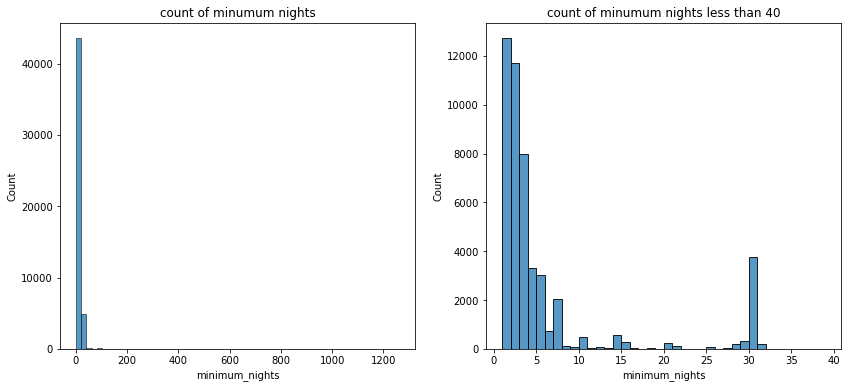

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(data=data, x = 'minimum_nights', binwidth = 20, ax=ax1)
ax1.set(title="count of minumum nights")
sns.histplot(x = min_nights_lessthan40, binwidth = 1, ax=ax2)
ax2.set(title="count of minumum nights less than 40")

We see that the minimum number of nights for all reservations made on airbnb are concentrated below 5 with a small peak at 30. Minumum_nights is right-skewed.

## price

In [11]:
df_price_lessthan400 = data.price[data.price<400]

[Text(0.5, 1.0, 'count of prices < 400')]

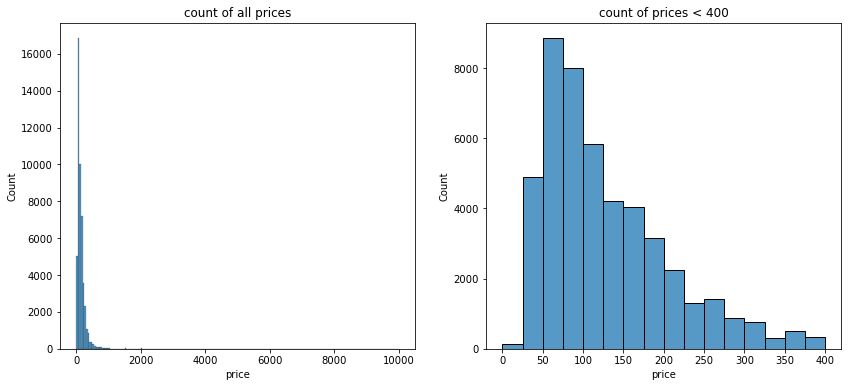

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(data=data, x = 'price', binwidth=50, ax=ax1)
ax1.set(title="count of all prices")
sns.histplot(x = df_price_lessthan400, binwidth=25, ax=ax2)
ax2.set(title="count of prices < 400")

We see that the largest concentration of prices is below 200 dollars, with the peak at \$50-100. Price is right-skewed.

## Price in relation to neighbourhood_group

In [13]:
sub_1=data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]

sub_2=data.loc[data['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]

sub_3=data.loc[data['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]

sub_4=data.loc[data['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]

sub_5=data.loc[data['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

price_by_loc = [price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [14]:
description_by_loc = map(lambda df: df.describe(), price_by_loc)
merged_df = pd.concat(description_by_loc, axis=1)
merged_df.columns = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island','Bronx']

In [15]:
merged_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
count,20104.000000,21661.000000,5666.000000,373.000000,1091.000000
mean,124.383207,196.875814,99.517649,114.812332,87.496792
std,186.873538,291.383183,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
75%,150.000000,220.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

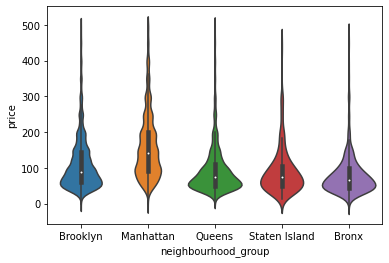

In [16]:
sns.violinplot(data=data[data.price < 500], x='neighbourhood_group', y='price')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

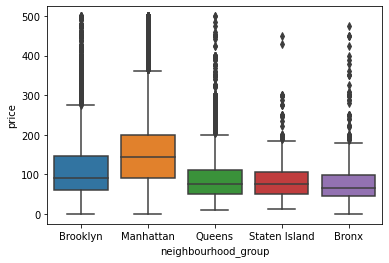

In [17]:
sns.boxplot(data=data[data.price < 500], x='neighbourhood_group', y='price')

Manhanttan has the largest range(excluding outliers) and the highest median price (\\$150), followed by Brooklyn(\\$90). Queens, Staten Island have very similar distributions, whereas Bronx has the lowest median price. 
There are more outliers in the Queens, Staten Island and Bronx.

## Price in relation to Room type

In [18]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

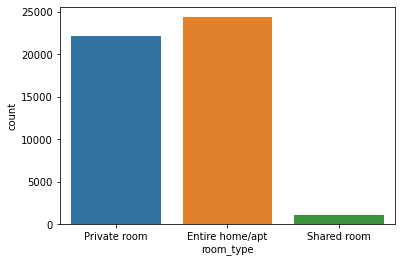

In [19]:
sns.countplot(data=data[data.price < 500], x='room_type')

<AxesSubplot:xlabel='room_type', ylabel='price'>

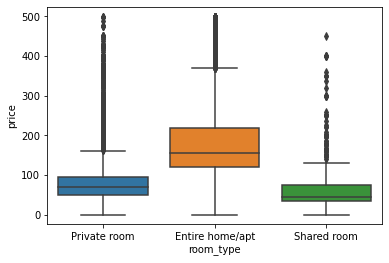

In [20]:
sns.boxplot(data=data[data.price < 500], x='room_type', y='price')

Entire home/apt and private room are the most common and naturally, also the most expensive room types. Shared roomb scarce and is cheapest.

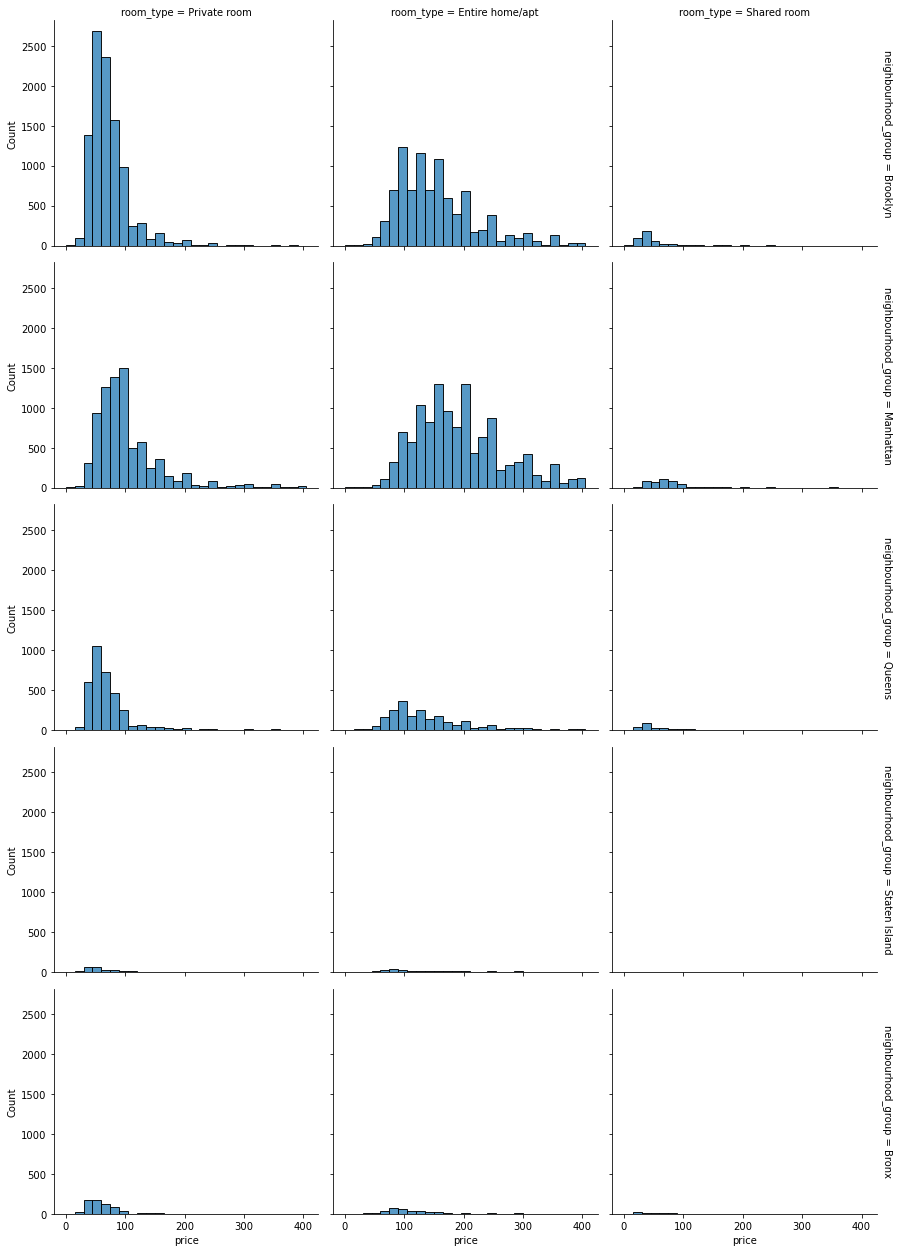

In [21]:
sns.displot(data=data[data.price < 400], x='price', binwidth = 15, col='room_type', row='neighbourhood_group', height=3.5, aspect=1.2, facet_kws=dict(margin_titles=True))

Entire home/apt is most expensive, followed by Private room and then Shared room. The prices of Private room are more clustered around the mean/have smaller deviations than the other room types, with a tall peak near $50-100. 

The prices of entire home/apt is generally more expensive that those of the same room type in Brooklyn.

## catplot for price of the room types in relation to neighbourhoods groups

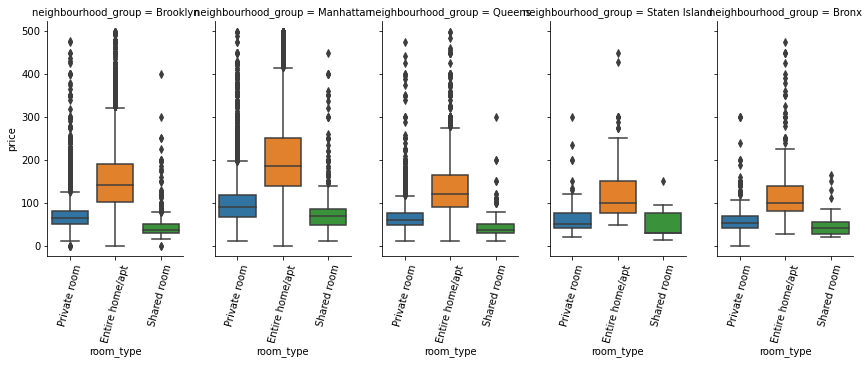

In [22]:
catplot = sns.catplot(x='room_type', y = 'price', col='neighbourhood_group', data=data[data.price < 500], kind='box',col_wrap=5, height=4, aspect= 0.6)
catplot.set_xticklabels(rotation=75)

## catplot for count of room types in relation to top 10 most listing-populated neighbourhood

In [23]:
popular_neighbourhood = data.neighbourhood.value_counts().head(10)
df_pop_neighbourhood=data.loc[data['neighbourhood'].isin(popular_neighbourhood.index)]

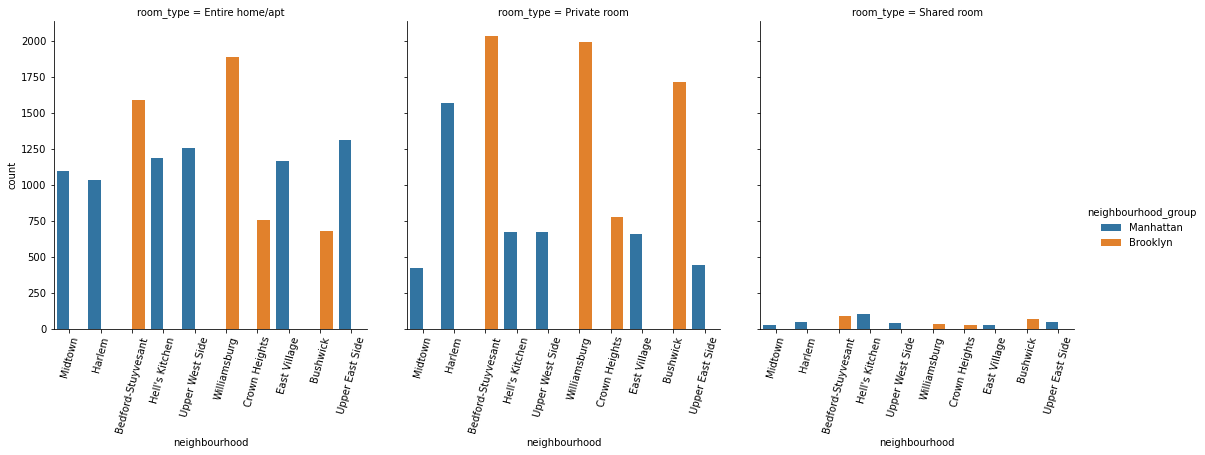

In [24]:
catplot_rmtype = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=df_pop_neighbourhood, kind='count')
catplot_rmtype.set_xticklabels(rotation=75)

The difference between the availability of 'Shared room' type and the other room types is staggering among 10 most listing-populated neighborhoods, but remember that as we have seen previously, 'Shared room" room type is scarce in general.

The 10 most listing-populated neighborhoods belong to only 2 neighbourhood groups: Manhattan and Brooklyn, which is expected as Manhattan and Brooklyn are two of the most traveled destinations. We also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

## distributions of the price of the 10 most listing-populated neighbourhoods

In [25]:
df_price_lt400_top10_neighbourhoods = data.loc[(data['neighbourhood'].isin(popular_neighbourhood.index)) & (data['price'] < 400)]

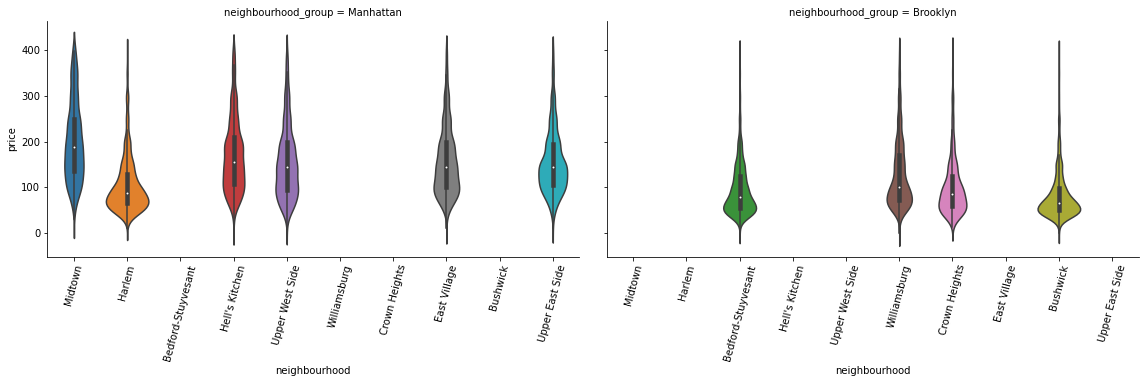

In [26]:
catplot_neighbourhood = sns.catplot(x='neighbourhood', y='price', col='neighbourhood_group', data=df_price_lt400_top10_neighbourhoods, kind='violin', height=4, aspect= 2)
catplot_neighbourhood.set_xticklabels(rotation=75)

We can see that Midtown, Hell's Kitchen, Upper West Side have a large range of prices in comparison to the others such as Harlem, Bedford-Stuyvesant, Crown Heights, and Bushwick, which have a more concentrated density near the median. 

## distributions of the price of the 10 most expensive neighbourhoods

In [27]:
expensive_neighbourhoods = data.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10).index

In [28]:
expensive_neighbourhoods

Index(['Fort Wadsworth', 'Woodrow', 'Tribeca', 'Neponsit', 'NoHo',
       'Willowbrook', 'Flatiron District', 'Midtown', 'West Village',
       'Financial District'],
      dtype='object', name='neighbourhood')

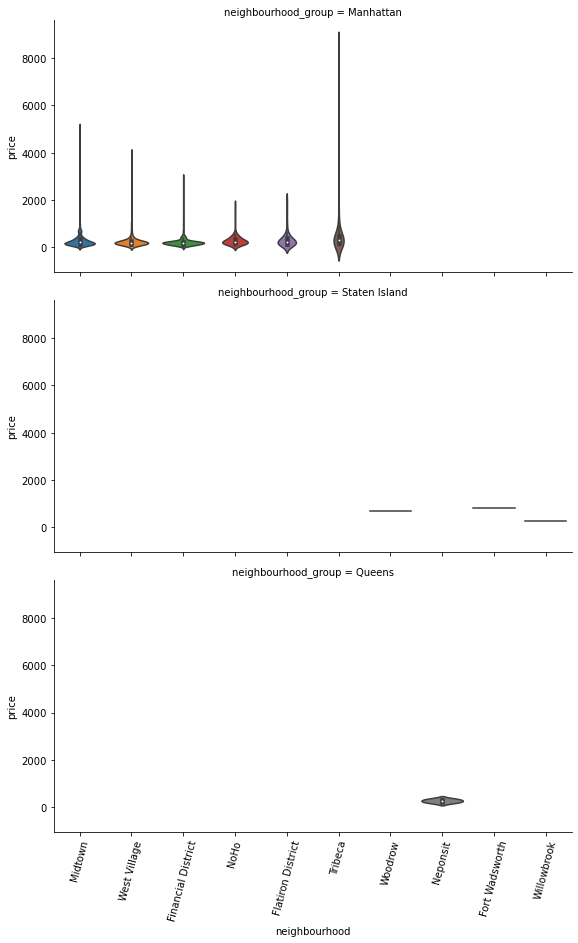

In [29]:
df_expensive_neighbourhoods = data[data.neighbourhood.isin(expensive_neighbourhoods)]
catplot_expensive = sns.catplot(x='neighbourhood', y='price', col = 'neighbourhood_group', data=df_expensive_neighbourhoods, kind='violin', col_wrap = 1,height=4, aspect= 2)
catplot_expensive.set_xticklabels(rotation=75)

A majority of the 10 most expensive neighbourhoods fall under Manhattan. It is clear that Woodrow, Fort Wadsworth, and Willowbrook do not have a distribution because they are only a few inputs belonging to those neighbourhoods. Tribeca has a very large outlier that is thousands away from the median. The distribution of Neponsit is very densed around the median and the 25th and 75th percentile are all very close to the median, suggesting a small number of inputs for that neighbourhood.

In [30]:
data.neighbourhood.value_counts().loc[['Woodrow','Fort Wadsworth', 'Willowbrook', 'Neponsit']]

Woodrow           1
Fort Wadsworth    1
Willowbrook       1
Neponsit          3
Name: neighbourhood, dtype: int64

## distributions of the price of the 10 least expensive neighbourhoods

In [31]:
cheapest_neighbourhoods = data.groupby('neighbourhood')['price'].median().sort_values(ascending=True).head(10).index

In [32]:
cheapest_neighbourhoods

Index(['Concord', 'Castle Hill', 'New Dorp Beach', 'Corona', 'Hunts Point',
       'Tremont', 'Bull's Head', 'Mount Eden', 'Whitestone', 'Soundview'],
      dtype='object', name='neighbourhood')

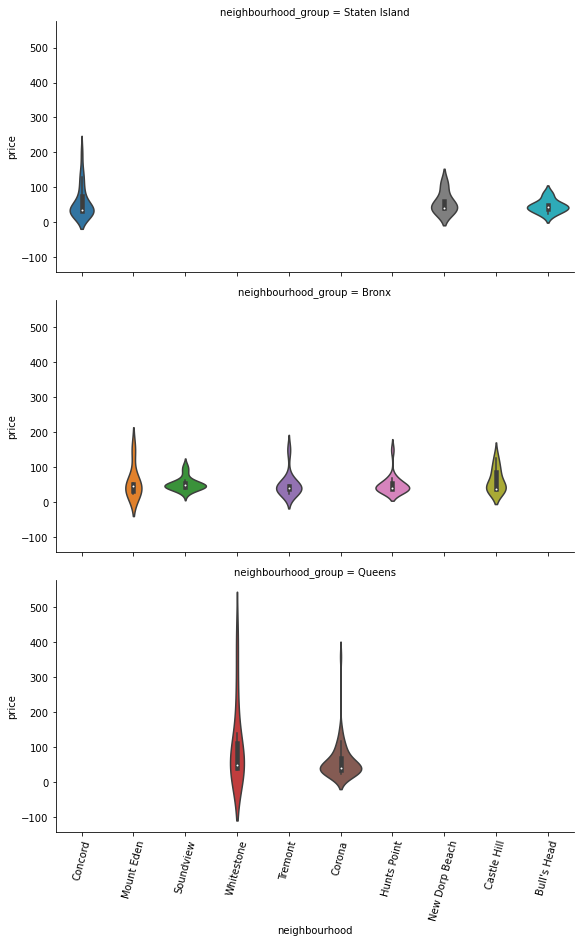

In [33]:
df_cheapest_neighbourhoods = data[data.neighbourhood.isin(cheapest_neighbourhoods)]
catplot_cheap = sns.catplot(x='neighbourhood', y='price', data=df_cheapest_neighbourhoods, col = 'neighbourhood_group', col_wrap = 1, kind='violin', height=4, aspect= 2)
catplot_cheap.set_xticklabels(rotation=75)

The cheapest neighbourhoods fall under Staten Island, Bronx, and Queens. Whitestone and Corona have wide price ranges. Recall that Staten Island also contains one of the most expensive neighbourhoods.

## Number of reviews in relation to price

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

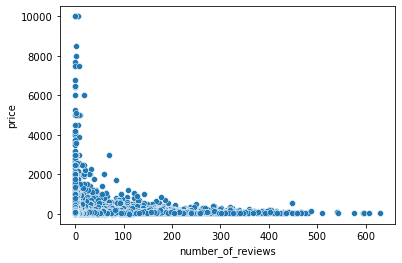

In [34]:
sns.scatterplot(x='number_of_reviews', y = 'price', data=data)

In general, customers are more inclined to write reviews if they have a negative experience. From the above plot, we see that the most expensive airbnbs have very little reviews and the number of reviews increases as the price decreases. It is probable that the customers who paid a lot have a nice experience with the airbnb and thus do not write reviews.

## latitude and longtitude

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

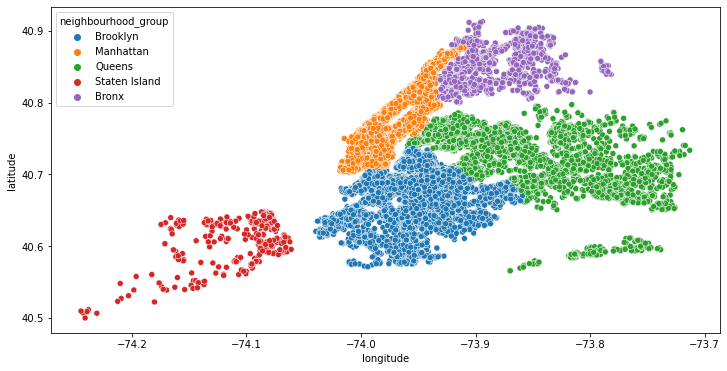

In [35]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude', y = 'latitude', data=data, hue='neighbourhood_group')

## Price in relation to availability

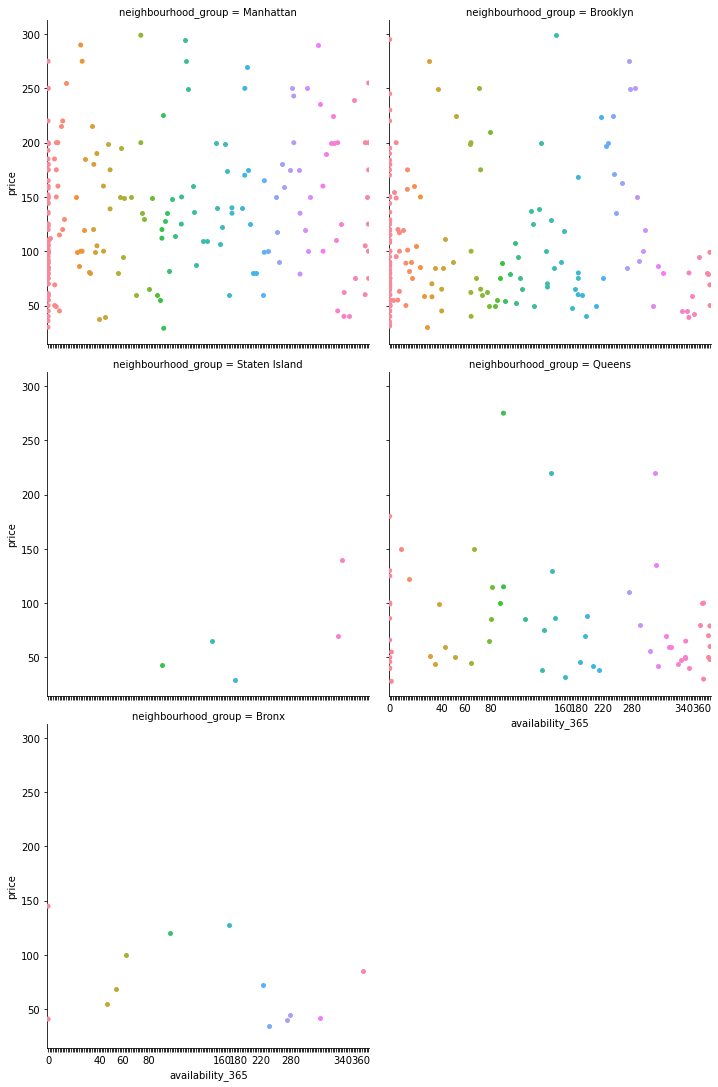

In [36]:
plot = sns.catplot(x='availability_365', y = 'price', data=data[data.price < 300].sample(500), col='neighbourhood_group', kind='strip', col_wrap = 2)

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        if np.int(label.get_text()) % 20 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
        

It doesn't seem like the availability of the airbnbs have an impact on the pricing.

## Relationship between NAs and Price

In [37]:
from random import sample
ids_of_na_rows = data[data.isnull().any(axis=1)].id
b = data[~data.id.isin(ids_of_na_rows)]
d = {'1 or more NAs': data[data.isnull().any(axis=1)].price, '0 NAs': b.loc[sample(list(b.index),10000)].price}
df1 = pd.DataFrame(data=d)
ids_of_na_rows.shape

(10074,)

<AxesSubplot:>

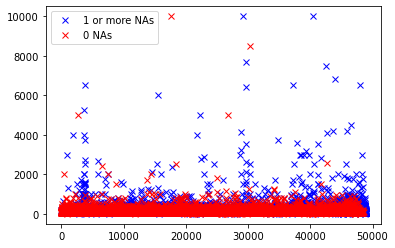

In [38]:
df1.plot(style=['bx','rx'])

We can see that the price is higher for the rows with NA values in one or more columns. Thus, whether a listing has NA values does have an impact on its price.

# Correlation

<AxesSubplot:>

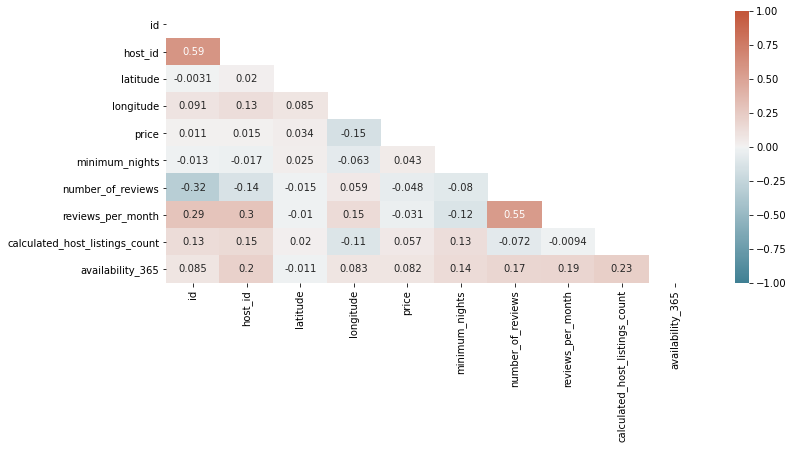

In [39]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(12,5))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = cmap, mask=mask, annot = True)

## Data cleaning & Preprocessing

In [40]:
data['reviews_per_month']=data['reviews_per_month'].replace(np.nan, 0)

In [41]:
from sklearn.model_selection import train_test_split
X = data.drop(['name', 'host_name','id','host_id','last_review', 'price'], axis = 1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(39116, 10)

In [43]:
X_test.shape

(9779, 10)

In [44]:
X_train.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_features = X_train.select_dtypes(include=numerics).columns

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())])

categorical_features = ['room_type','neighbourhood_group','neighbourhood']
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

preprocessor.fit(X_train)

transformed_X_train= preprocessor.transform(X_train)

transformed_X_test = preprocessor.transform(X_test)

In [47]:
new_features = preprocessor.transformers_[1][1]\
    .named_steps['onehot'].get_feature_names(categorical_features)
print(len(new_features))
print(new_features[:15])

228
['room_type_Entire home/apt' 'room_type_Private room'
 'room_type_Shared room' 'neighbourhood_group_Bronx'
 'neighbourhood_group_Brooklyn' 'neighbourhood_group_Manhattan'
 'neighbourhood_group_Queens' 'neighbourhood_group_Staten Island'
 'neighbourhood_Allerton' 'neighbourhood_Arden Heights'
 'neighbourhood_Arrochar' 'neighbourhood_Arverne' 'neighbourhood_Astoria'
 'neighbourhood_Bath Beach' 'neighbourhood_Battery Park City']


In [48]:
print(X_train.shape)
print(transformed_X_train.shape)

(39116, 10)
(39116, 235)


# Box Cox Transformation
We have seen earlier that the distribution of price is right-skewed.

[Text(0.5, 1.0, 'Price Distribution after Box Cox')]

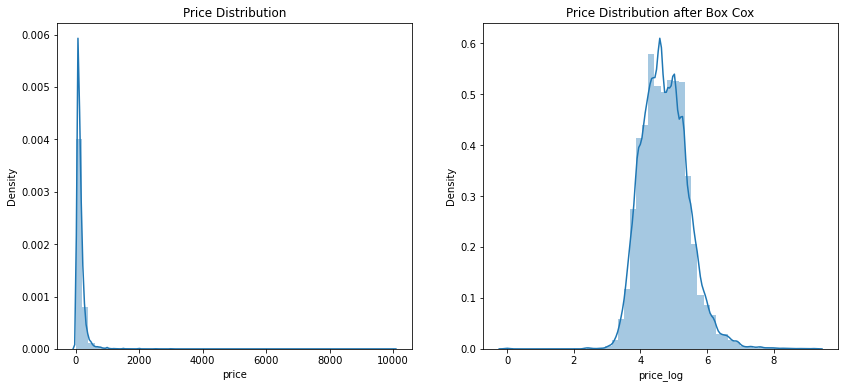

In [49]:
data['price_log'] = np.log(data.price+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.distplot(data['price'], ax=ax1)
ax1.set(title="Price Distribution")
sns.distplot(data['price_log'], ax=ax2)
ax2.set(title="Price Distribution after Box Cox")

# PCA

In [50]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
n_features_to_test = np.arange(1, 236, 10)

grid = GridSearchCV(PCA(),
                    param_grid=[{'n_components': n_features_to_test}],
                    cv=5)

grid.fit(transformed_X_train.toarray())

GridSearchCV(cv=5, estimator=PCA(),
             param_grid=[{'n_components': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231])}])

In [51]:
print(grid.best_params_)

{'n_components': 181}


In [52]:
pca = PCA(n_components = 181)
pca.fit(transformed_X_train.toarray())
X_train_pca = pca.transform(transformed_X_train.toarray())
X_test_pca = pca.transform(transformed_X_test.toarray())
print(X_train_pca.shape)

(39116, 181)


In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train_pca,y_train)

LinearRegression()

In [54]:
print(lm.score(X_train_pca,y_train))
print(lm.predict(X_test_pca))
print(y_test)

0.11183107849813068
[161.50722789  47.46398987 127.80783719 ...  54.23021426 214.82771925
 180.86602838]
879       89
44383     30
15394    120
43230    470
16332    199
        ... 
20477    215
44969    100
36577     70
11477    500
1023     125
Name: price, Length: 9779, dtype: int64


In [55]:
# print(lm.score(transformed_X_train,y_train))
# transformed_X_train.shape
# print(lm.predict(transformed_X_test))

## Test

In [56]:
# grid = GridSearchCV(
#     Pipeline([
#         ('reduce_dim', PCA()),
#         ('classify', RandomForestClassifier(n_jobs = -1))
#         ]),
#     param_grid=[
#         {
#             'reduce_dim__n_components': range(0.7,0.9,0.1),
#             'classify__n_estimators': range(10,50,5),
#             'classify__max_features': ['auto', 0.2],
#             'classify__min_samples_leaf': [40,50,60],
#             'classify__criterion': ['gini', 'entropy']
#         }
#     ],
#     cv=5, scoring='f1')

# grid.fit(X,y)


In [57]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# mean_squared_error(y_train, clf.predict(X_train))